# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №5
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы рассмотрите пройденные в курсе методы с точки зрения визуализации их "внутренностей". Девиз задания - все интерпретируемо! Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join(r'C:\Users\79671\data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
random_seed = 0
spec = LabelEncoder().fit(table_data.species).transform(table_data.species)

In [8]:
import numpy as np
X = table_data.loc[:, 'id':'texture64']
X1 = np.matrix(table_data.loc[:, 'margin1':'texture64'])#X нужен для того, чтобы затем было удобно обращаться к id
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=random_seed)
sss.split(X1, spec)
for train_index, test_index in sss.split(X, spec):
    train_idx, test_idx = train_index, test_index
X.species = spec

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [9]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


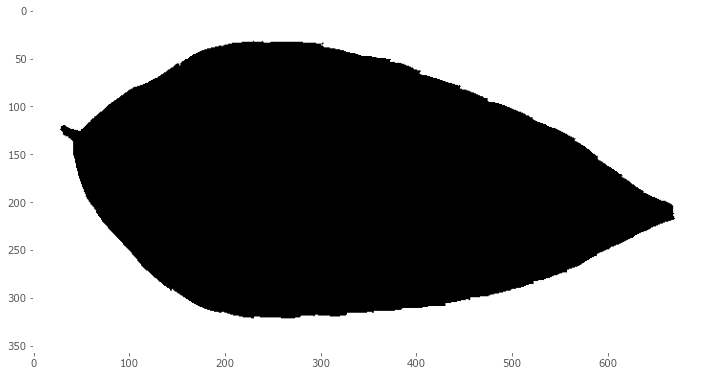

In [10]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [11]:
from skimage.transform import resize

In [12]:
img_resized = resize(img, (100, 100))

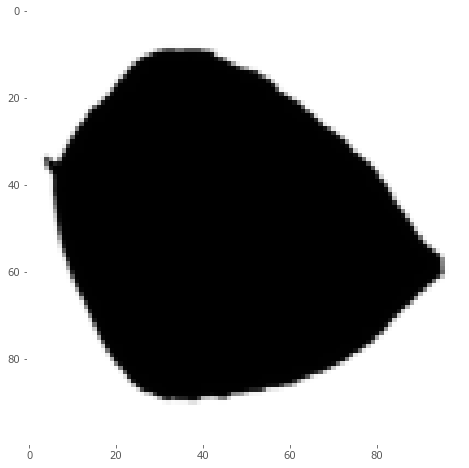

In [13]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов.  В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [14]:
leaves_data = []
leaves_ts = []
filepath = os.path.join(IMG_DIR, '*.jpg')
list_of_images = sorted(os.listdir(IMG_DIR))
for i in list_of_images:
    leaves_ts.append(resize(plt.imread(os.path.join(IMG_DIR, i)), (100,100)))
    leaves_data.append(np.ravel(resize(plt.imread(os.path.join(IMG_DIR, i)), (100,100))))

In [15]:
imgs_train = []
spec_train = []
for i in train_idx:
    imgs_train.append(leaves_data[i])
    spec_train.append(table_data.species[i])

In [16]:
imgs_test = []
spec_test = []
for i in test_idx:
    imgs_test.append(leaves_data[i])
    spec_test.append(table_data.species[i])

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

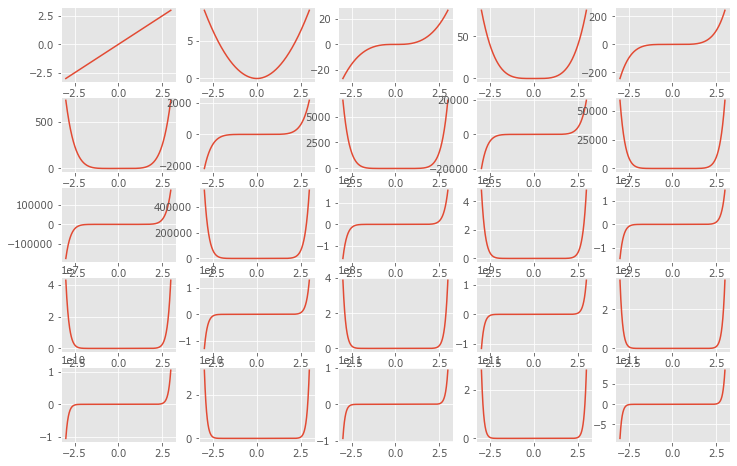

In [17]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

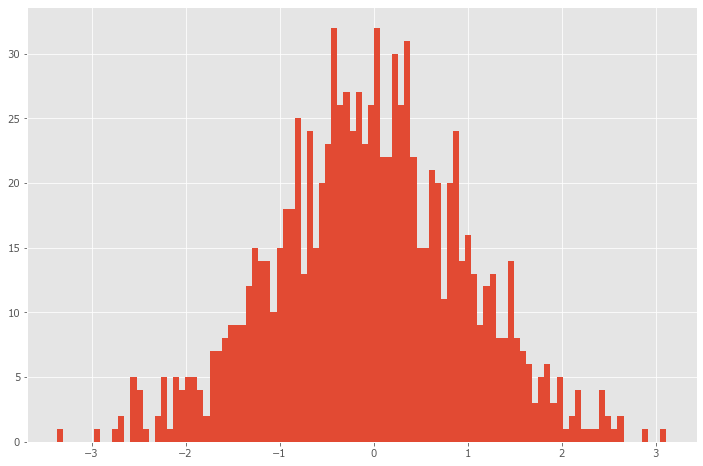

In [18]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (1 балл код +1 балл выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

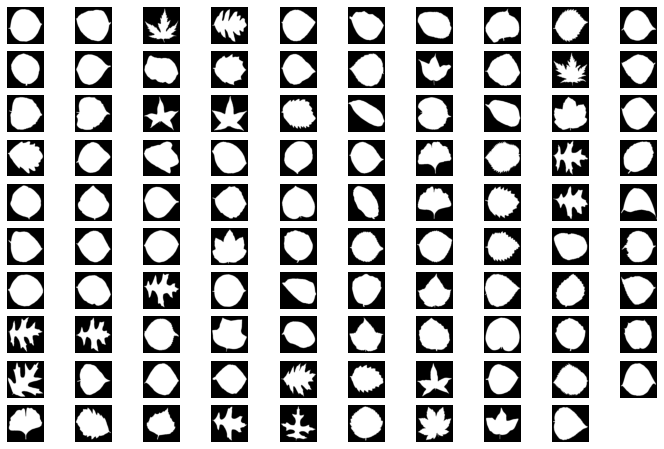

In [19]:
import matplotlib.image as mpimg
for i in range(99):
    plt.subplot(10,10,i+1)
    imageFilename = IMG_DIR + '/' + str(test_idx[i]) + '.jpg' #данное задание проще выполнить на тестовой выборке, т.к. там содержится по !одному листу каждого типа
    plt.imshow(resize(mpimg.imread(imageFilename), (100,100)), cmap='gray')
    plt.axis("off")

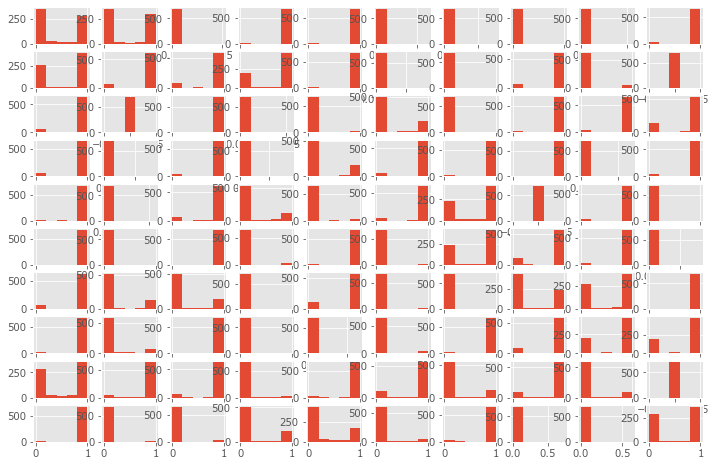

In [20]:
import random
pix = []
pixx = []
for i in range(100):
    pix.append(random.randint(1,10000))
imgs = pd.DataFrame(imgs_train)
for i in pix:
    pixx.append(imgs[i])
for k in range(100):
    plt.subplot(10,10,k+1)
    plt.hist(pixx[k], bins=5)

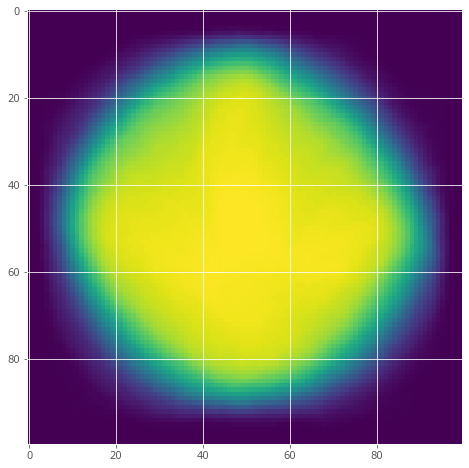

In [21]:
from PIL import ImageTk, Image
meann = []
for i in range(imgs.shape[1]):
    meann.append(np.mean(imgs.iloc[:,i]))
B = np.reshape(meann, (-1, 100))
img1 = Image.fromarray(B)      
plt.imshow(np.asarray(img1))

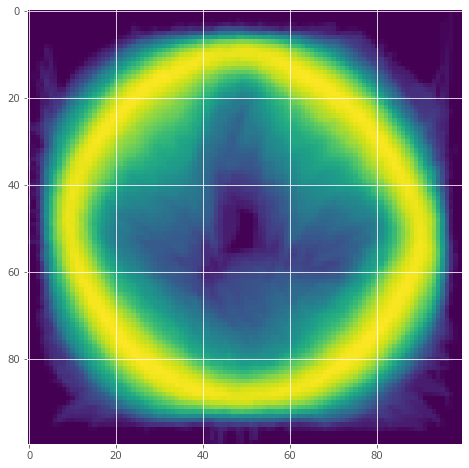

In [22]:
sttd = []
for i in range(imgs.shape[1]):
    sttd.append(np.std(imgs.iloc[:,i]))
B = np.reshape(sttd, (-1, 100))
img2 = Image.fromarray(B)      
plt.imshow(np.asarray(img2))

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

*Листья нельзя отличить визуально, т.к. есть листья, относящиеся к разным классам и визуально очень схожие
(есть на первом графике). Однако, мы можем визуально разбить их по группам. Есть листья с острыми концами, есть более округлые и т.д. 

*Признаки изменяются от 0 до 1. Чаще всего признаки принимают значения 0 и 1, поэтому множество очень нагружено по концам признаки сравнительно редко принимают промежуточные значения. 

*Судя по графикам, значения в целом можно бинаризировать. С другой стороны, так мы теряем информацию о характере контуров листьев, что может быть важным при обучении. Бинаризацию в сторону единицы лучше всего проводить как можно ближе к нулю (к примеру, начиная с 0,1).

*Средний лист очень не похож на обычный лист. Из-за усреднения всех листьев мы потеряли много информации, поэтому он стал похож на круглый ромб. Константных признаков и похожих на них достаточно много, но большая часть из них - это "фон", а не сам лист. Константными признаками у самих листов являются обычно их центры

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

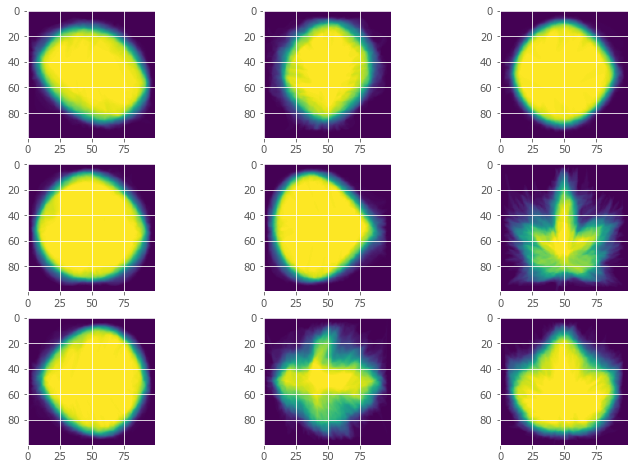

In [23]:
from sklearn.cluster import KMeans
knn = KMeans(n_clusters=9, random_state = random_seed)
knn.fit(imgs_train)
for i in range(9):
    plt.subplot(3,3,i+1)    
    B = np.reshape(knn.cluster_centers_[i], (-1, 100))
    img = Image.fromarray(B)   
    plt.imshow(np.asarray(img))
    

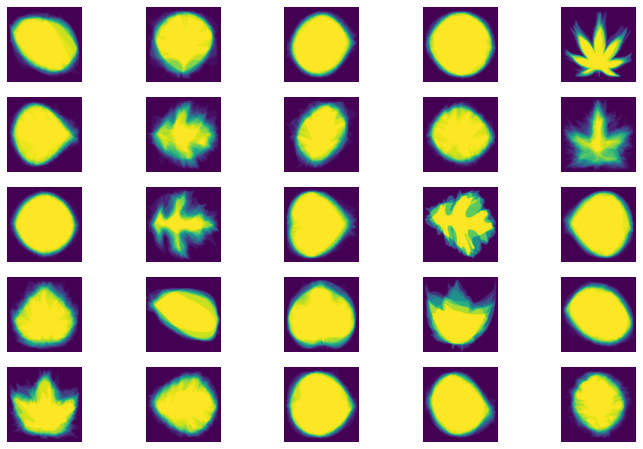

In [24]:
from sklearn.cluster import KMeans
knn = KMeans(n_clusters=25, random_state = random_seed)
knn.fit(imgs_train)
for i in range(25):
    plt.subplot(5,5,i+1)    
    B = np.reshape(knn.cluster_centers_[i], (-1, 100))
    img = Image.fromarray(B)   
    plt.imshow(np.asarray(img))
    plt.axis("off")

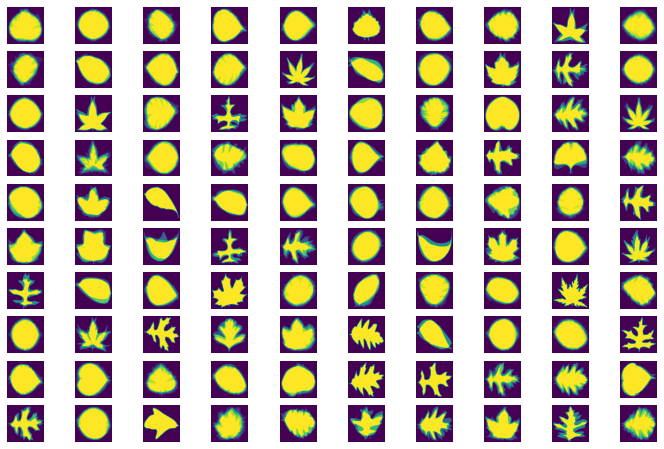

In [25]:
from sklearn.cluster import KMeans
knn = KMeans(n_clusters=100, random_state = random_seed)
knn.fit(imgs_train)
for i in range(100):
    plt.subplot(10,10,i+1)    
    B = np.reshape(knn.cluster_centers_[i], (-1, 100))
    img = Image.fromarray(B)   
    plt.imshow(np.asarray(img))
    plt.axis("off")

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

*Центры кластеров похожи на листья*

*Существуют "вырожденные" центры, сильно не похожие на оригинальные листья (особенно хорошо видно на модели с 100 кластеров). Это объясняется тем, что модель объединяет визуально не очень схожие листья (судя по всему, остаточно).*

*Есть много достаточно похожих кластеров округлых форм*

*Мне кажется, что лучше всего подходит модель с 25 кластерами. С одной стороны, там мало дублирующих кластеров (и, как следствие, потенциального переобучения). С другой стороны, она будет точнее, чем модель с 9 кластерами.*

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)
Настройте 3 классификатора на изображениях и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется атрибут feature\_log\_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [26]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(imgs_train, spec_train)
nc.score(imgs_test, spec_test)

0.020202020202020204

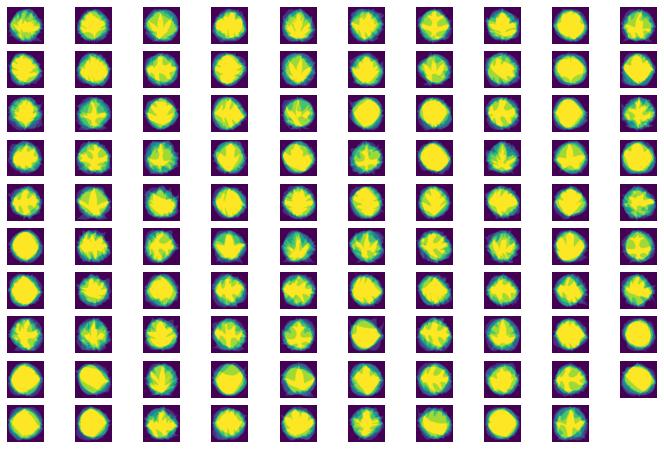

In [27]:
for i in range(99):
    plt.subplot(10,10,i+1)    
    B = np.reshape(nc.centroids_[i], (-1, 100))
    img = Image.fromarray(B)   
    plt.imshow(np.asarray(img))
    plt.axis("off")#после графика становится понятной причина такого ошеломительного accuracy

In [28]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X = imgs_train, y = spec_train)
gnb.score(imgs_test, spec_test)

0.010101010101010102

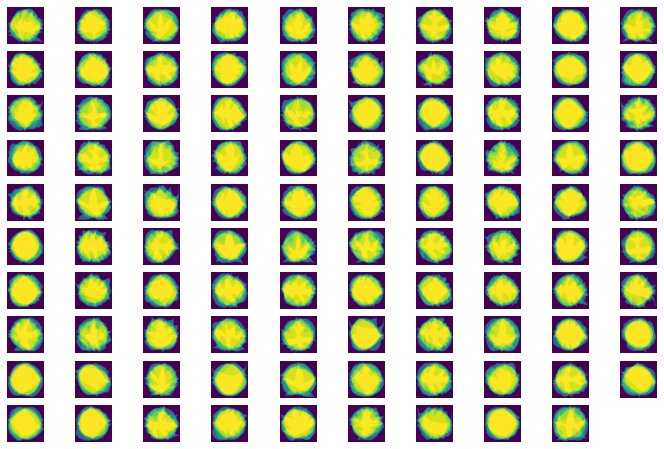

In [29]:
for i in range(99):
    plt.subplot(10,10,i+1)    
    B = np.reshape(gnb.feature_log_prob_[i], (-1, 100))
    img = Image.fromarray(B)   
    plt.imshow(np.asarray(img))
    plt.axis("off")

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = random_seed, n_jobs = -1).fit(X = imgs_train, y = spec_train)
clf.score(imgs_test, spec_test)

0.006734006734006734

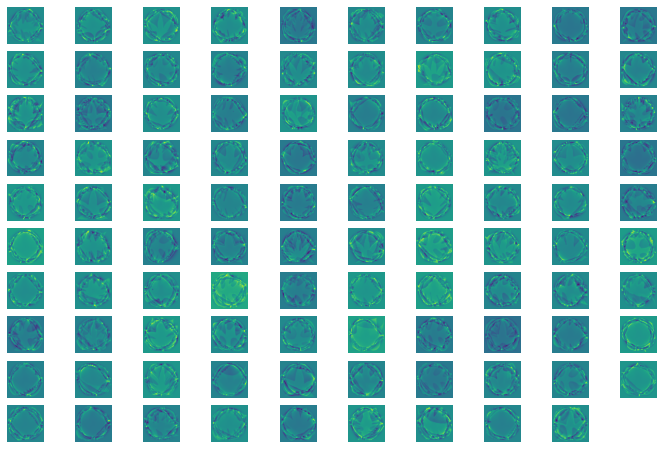

In [31]:
for i in range(99):
    plt.subplot(10,10,i+1)    
    B = np.reshape(clf.coef_[i], (-1, 100))
    img = Image.fromarray(B)   
    plt.imshow(np.asarray(img))
    plt.axis("off")

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

*Лучше всего работает логистическая регрессия. Предположу, что логистическая регрессия наиболее чувствительна к отклонениям при дефолтных значениях гиперпараметров*

*Не похоже ничего их списка, т.к. слишком сильно сглажены отклонения*

*Из-за другой области определения значений*

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на изображениях. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = random_seed)
rf.fit(X = imgs_train, y = spec_train)
rf.score(imgs_test, spec_test)

0.010101010101010102

(-0.5, 99.5, 99.5, -0.5)

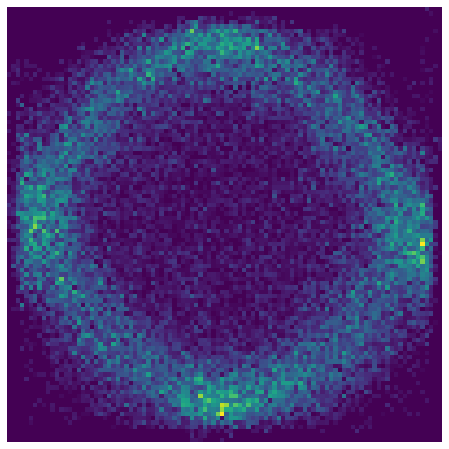

In [33]:
B = np.reshape(rf.feature_importances_, (-1, 100))
img = Image.fromarray(B)   
plt.imshow(np.asarray(img))
plt.axis("off")

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

*Нет, RF также упускает большой процент отклонений*

*Нет, RF упустил много признаковой информации и в целом плохо подогнан. К примеру, он совсем не уловил признаковые отклонения "многоугольных" листов с большим кол-вом сублистьев*

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [34]:
num_components = 2**np.arange(10)

In [35]:
from sklearn.decomposition import PCA
scores_c = []
for k in num_components:   
    pca = PCA(n_components = k, random_state = random_seed, svd_solver = 'auto')
    pca.fit(imgs_train)
    scores_c.append(pca.score(imgs_train))


KeyboardInterrupt: 

In [ ]:
scores_rf1 = []
for k in num_components:   
    pca = PCA(n_components = k, random_state = random_seed, svd_solver = 'auto')
    pca.fit(imgs_train)
    la = pca.transform(imgs_train)
    la = np.matrix(la)
    la = la.T
    rf.fit(X = la, y = spec_train)
    score_rf1.append(rf.score(la))


In [ ]:
scores_t

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

In [36]:
imm = pd.DataFrame(imgs_train)
iii = []
for i in range(imm.shape[1]):
    st = []
    for j in range(imm.shape[0]):
        st.append(imgs_train[j][i])
    iii.append(st)
   
scores_c = []

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [37]:
TRAINX, TRAINY, TestX, TestY = [], [], [], []
X1 = pd.DataFrame(X1)
for i in train_idx:
    TRAINX.append(X1.iloc[i,:])
    TRAINY.append(spec[i])
for i in test_idx:
    TestX.append(X1.iloc[i,:])
    TestY.append(spec[i])

rf.fit(TRAINX, TRAINY)
rf.score(TestX, TestY)

0.9663299663299664

*Качество значительно выросло. Это связано с меньшим шумом в данных и хорошо извлеченными параметрами*

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса для модели на табличных данных.

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = random_seed)
skf.split(TRAINX, TRAINY)
for train, test in skf.split(TRAINX, TRAINY):
    tr1, t1 = train, test
ttrr = []
ttee = []
for i in tr1:
    ttrr.append(TRAINX[i])
    ttee.append(TRAINY[i])
param_grid = {"n_estimators":2**np.arange(12)}
gs = GridSearchCV(RandomForestClassifier(random_state=random_seed, warm_start=True), param_grid, verbose=3)
gs.fit(ttrr, ttee)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.365, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.404, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.365, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.413, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.240, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ...................... n_estimators=2, score=0.375, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=2 ..................................................
[CV] ...................... n_estimators=2, score=0.394, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ...................... n_estimators=2, score=0.462, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ...................... n_estimators=2, score=0.298, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ...................... n_estimators=4, score=0.462, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ...................... n_estimators=4, score=0.558, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ...................... n_estimators=4, score=0.452, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ...................... n_estimators=4, score=0.538, total=   0.0s
[CV] 

In [ ]:
gs.best_params_ #Болььше всего при esimators = 2048, но это уже очень долго. Поэтому возьмем 512
ttrr = []
ttee = []
for i in t1:
    ttrr.append(TRAINX[i])
    ttee.append(TRAINY[i])
rf = RandomForestClassifier(n_estimators = 512)
rf.fit(ttrr, ttee)
rf.score(TestX, TestY)

In [ ]:
pred = rf.predict(TestX)
rp = []
rt = []
for i in range(len(pred)):
    if pred[i] != TestY[i]:
        rp.append(pred[i])
        rt.append(TestY[i])

In [ ]:
for i in range(6):
    plt.subplot(3,2,i+1)      
    imageFilename = IMG_DIR + '/' + str(rp[i]) + '.jpg'
    plt.imshow(resize(mpimg.imread(imageFilename), (100,100)), cmap='gray')
    imageFilename = IMG_DIR + '/' + str(rt[i]) + '.jpg'
    plt.imshow(resize(mpimg.imread(imageFilename), (100,100)), cmap='gray')
    plt.axis("off")
    